# **Auto-tag images of galas**

In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install keras --upgrade 

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)


# Importing Libraries

In [2]:
import pandas as pd 
import numpy as np 
from keras.models import Model, load_model 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

import pickle
%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/Hackerearth/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/Hackerearth/dataset/Train Images/image9235.jpg
/content/drive/My Drive/Hackerearth/dataset/Train Images/image2967.jpg
/content/drive/My Drive/Hackerearth/dataset/Train Images/image10575.jpg
/content/drive/My Drive/Hackerearth/dataset/Train Images/image10208.jpg
/content/drive/My Drive/Hackerearth/dataset/Train Images/image2996.jpg
/content/drive/My Drive/Hackerearth/dataset/Train Images/image3012.jpg
/content/drive/My Drive/Hackerearth/dataset/Train Images/image642.jpg
/content/drive/My Drive/Hackerearth/dataset/Train Images/image4415.jpg
/content/drive/My Drive/Hackerearth/dataset/Train Images/image36.jpg
/content/drive/My Drive/Hackerearth/dataset/Train Images/image8770.jpg
/content/drive/My Drive/Hackerearth/dataset/Train Images/image10550.jpg
/content/drive/My Drive/Hackerearth/dataset/Train Images/image726.jpg
/content/drive/My Drive/Hackerearth/dataset/Train Images/image7832.jpg
/content/drive/My Drive/Hac

# Number of datapoints and number of columns in Train and Test datasets

In [4]:
# train_data = pd.read_csv('/content/drive/My Drive/Hackerearth/dataset/train.csv')

train = pd.read_csv('/content/drive/My Drive/Hackerearth/dataset/train.csv')
print(train.shape)
test = pd.read_csv('/content/drive/My Drive/Hackerearth/dataset/test.csv')
print(test.shape)

(5983, 2)
(3219, 1)


In [5]:
train.head() 

,Image,Class
0,image7042.jpg,Food
1,image3327.jpg,misc
2,image10335.jpg,Attire
3,image8019.jpg,Food
4,image2128.jpg,Attire


In [6]:
test.head() 

,Image
0,image6245.jpg
1,image10409.jpg
2,image8692.jpg
3,image10517.jpg
4,image2580.jpg


# Number of Classes and their respective datapoints in Train dataset

In [0]:
sp = train['Class'].value_counts() 

In [8]:
print(sp)

Food                    2278
Attire                  1691
misc                    1271
Decorationandsignage     743
Name: Class, dtype: int64


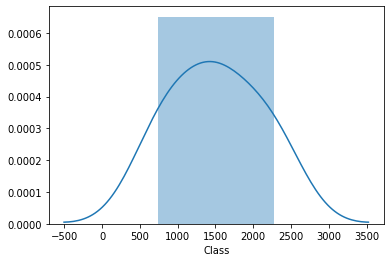

In [9]:
sns.distplot(sp) 

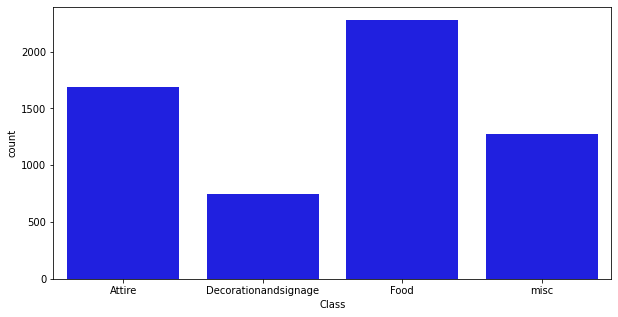

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='Class', data=train,
                   order=list(train['Class'].value_counts().sort_index().index) ,
                   color='blue') 

The above plot shows that the given dataset is imbalanced. 

In [0]:
le=LabelEncoder()
class_array=le.fit_transform(train.Class.unique())
class_array=to_categorical(class_array,len(train.Class.unique()))

In [13]:
class_array.shape

(4, 4)

In [0]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
Class_map={'Food':0,'Attire':1,'Decorationandsignage':2,'misc':3}
inverse_map={0:'Food',1:'Attire',2:'Decorationandsignage',3:'misc'}
train['Class']=train['Class'].map(Class_map)

# Resizing of Train images

In [0]:
train_img=[] 
train_label=[]   
j=0  
path='/content/drive/My Drive/Hackerearth/dataset/Train Images'
for i in tqdm(train['Image']): 
    final_path=os.path.join(path,i) 
    img=cv2.imread(final_path)  
    img=cv2.resize(img,(224,224)) 
    img=img.astype('float32')
    train_img.append(img)
    train_label.append(train['Class'][j])
    j=j+1

100%|██████████| 5983/5983 [00:22<00:00, 260.71it/s]


# Resizing of Test images

In [0]:
test_img=[]
path='/content/drive/My Drive/Hackerearth/dataset/Test Images' 
for i in tqdm(test['Image']):   
    final_path=os.path.join(path,i) 
    img=cv2.imread(final_path)   
    img=cv2.resize(img,(224,224))
    img=img.astype('float32')
    test_img.append(img)

100%|██████████| 3219/3219 [00:10<00:00, 310.60it/s]


# Augmentation on the Train dataset

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagenerator = ImageDataGenerator( 
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        rotation_range=10,  
        zoom_range = 0.20,  
        width_shift_range=0.20,  
        height_shift_range=0.20,  
        horizontal_flip=True,  
        vertical_flip=False) 


datagenerator.fit(train_img)
#datagenerator.fit(train)

In [0]:
train_img=np.array(train_img)
test_img=np.array(test_img)
train_label=np.array(train_label)
print(train_img.shape)
print(test_img.shape)
print(train_label.shape) 

(5983, 224, 224, 3)
(3219, 224, 224, 3)
(5983,)


In [0]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

from tensorflow.keras.callbacks import ReduceLROnPlateau

# Used ResNet50 as the base model

In [0]:
from keras.layers import *
from keras.models import Sequential
from keras.applications.resnet50 import ResNet50

base_model = ResNet50(
    weights='imagenet',
    include_top=False, 
    input_shape=(224, 224, 3), 
    pooling='avg',
)
base_model.trainable = False

model = Sequential([
  base_model,
  Dense(4, activation='softmax'),
])

# On top of base-model, VGG19 has been used

In [0]:
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.layers import *
from keras.models import Sequential
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape = (224, 224, 3),pooling='avg')
vgg19.trainable = False

model = Sequential([
  vgg19, 
  Dense(1024, activation='relu'),
  Dropout(0.5),
  Dense(256, activation='relu'),
  Dense(4, activation='softmax'),
])

# Training of the model

In [0]:
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

vgg19.trainable=False

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)

callbacks = [reduce_learning_rate]
    


model.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit_generator(datagenerator.flow(train_img, to_categorical(train_label,4), batch_size=64),
                    epochs=20,callbacks=callbacks) 

Epoch 1/20
94/94 [==============================] - 59s 632ms/step - loss: 1.2885 - accuracy: 0.6027
Epoch 2/20
94/94 [==============================] - 58s 614ms/step - loss: 0.7710 - accuracy: 0.7062
Epoch 3/20
94/94 [==============================] - 58s 616ms/step - loss: 0.7129 - accuracy: 0.7306
Epoch 4/20
94/94 [==============================] - 57s 608ms/step - loss: 0.6561 - accuracy: 0.7468
Epoch 5/20
94/94 [==============================] - 58s 616ms/step - loss: 0.6165 - accuracy: 0.7583
Epoch 6/20
94/94 [==============================] - 57s 612ms/step - loss: 0.5876 - accuracy: 0.7769
Epoch 7/20
94/94 [==============================] - 58s 614ms/step - loss: 0.5731 - accuracy: 0.7794
Epoch 8/20
94/94 [==============================] - 58s 617ms/step - loss: 0.5477 - accuracy: 0.7916
Epoch 9/20
94/94 [==============================] - 57s 606ms/step - loss: 0.5341 - accuracy: 0.7919
Epoch 10/20
94/94 [==============================] - 57s 609ms/step - loss: 0.5182 - accura

# Prediction for the given Test dataset

In [0]:
labels = model.predict(test_img)
print(labels[:4])
label = [np.argmax(i) for i in labels]
class_label = [inverse_map[x] for x in label]
print(class_label[:3])
submission = pd.DataFrame({ 'Image': test.Image, 'Class': class_label })
submission.head(10)
# submission.to_csv('/content/drive/My Drive/Hackerearth/dataset', index=False) 

[[9.36431110e-01 7.41220918e-03 5.48287341e-03 5.06738387e-02]
 [9.70773578e-01 1.09308457e-03 8.60734144e-04 2.72725206e-02]
 [9.60371971e-01 1.47644705e-05 1.61935887e-07 3.96131128e-02]
 [9.95514095e-01 6.34975822e-06 8.75637056e-07 4.47863853e-03]]
['Food', 'Food', 'Food']


,Image,Class
0,image6245.jpg,Food
1,image10409.jpg,Food
2,image8692.jpg,Food
3,image10517.jpg,Food
4,image2580.jpg,Attire
5,image848.jpg,Attire
6,image1232.jpg,Attire
7,image8386.jpg,Attire
8,image9828.jpg,misc
9,image9033.jpg,Attire


# Generation of csv file

In [0]:
submission.to_csv('/content/drive/My Drive/Hackerearth/dataset/Submission.csv', index=False) 